In [1]:
import highiq
import act
import glob
import os
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [29]:
file_list = glob.glob('/lambda_stor/data/rjackson/sgp_lidar/sgpdlacfC1.a1.*v0')
print(file_list)
out_path = '/lambda_stor/data/rjackson/lidar_quicklooks/'

['/lambda_stor/data/rjackson/sgp_lidar/sgpdlacfC1.a1.20170819.130020.nc.v0', '/lambda_stor/data/rjackson/sgp_lidar/sgpdlacfC1.a1.20170819.170020.nc.v0', '/lambda_stor/data/rjackson/sgp_lidar/sgpdlacfC1.a1.20170819.190020.nc.v0', '/lambda_stor/data/rjackson/sgp_lidar/sgpdlacfC1.a1.20170819.200020.nc.v0', '/lambda_stor/data/rjackson/sgp_lidar/sgpdlacfC1.a1.20170817.000020.nc.v0', '/lambda_stor/data/rjackson/sgp_lidar/sgpdlacfC1.a1.20170817.010019.nc.v0', '/lambda_stor/data/rjackson/sgp_lidar/sgpdlacfC1.a1.20170817.030019.nc.v0', '/lambda_stor/data/rjackson/sgp_lidar/sgpdlacfC1.a1.20170817.060020.nc.v0', '/lambda_stor/data/rjackson/sgp_lidar/sgpdlacfC1.a1.20170817.080020.nc.v0', '/lambda_stor/data/rjackson/sgp_lidar/sgpdlacfC1.a1.20170817.110020.nc.v0', '/lambda_stor/data/rjackson/sgp_lidar/sgpdlacfC1.a1.20170818.150020.nc.v0', '/lambda_stor/data/rjackson/sgp_lidar/sgpdlacfC1.a1.20170818.180020.nc.v0', '/lambda_stor/data/rjackson/sgp_lidar/sgpdlacfC1.a1.20170818.200019.nc.v0', '/lambda_st

In [35]:
i = 0
for f in file_list:
    if i % 100 == 0:
        print('%d/%d' % (i, len(file_list)))
    ds = highiq.io.load_arm_netcdf(f)
    my_ds = highiq.calc.get_psd(ds)
    my_ds = highiq.calc.calc_num_peaks(ds)
    my_ds = highiq.calc.get_lidar_moments(ds)
    # Make a stricter mask for Doppler velocity to favor excluding more noise
    my_ds['doppler_velocity'] = my_ds['doppler_velocity'].where(my_ds.intensity > 1.2)
    my_ds['npeaks'] = my_ds['npeaks'].where(my_ds.intensity > 1.2)
    # With ACT, we set up a TimeSeriesDisplay object with two sub plots
    my_display = act.plotting.TimeSeriesDisplay(my_ds, figsize=(15,8), subplot_shape=(2,))

    # The plot function takes in the same kwargs as matplotlib's plotting routines
    my_display.plot('npeaks', subplot_index=(0,), cmap='act_HomeyerRainbow', vmin=1, vmax=3)
    my_display.plot('doppler_velocity', subplot_index=(1,), cmap='act_balance', vmin=-5, vmax=5)
    my_display.set_yrng([0, 5000], subplot_index=(0,))
    my_display.set_yrng([0, 5000], subplot_index=(1,))
    my_display.fig.savefig(out_path + os.path.split(f)[1] + '.png', dpi=300)
    plt.close(my_display.fig)
    del my_display
    my_ds.close()
    del my_ds
    i = i + 1

0/1401


/homes/rjackson/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/xarray/core/computation.py:604: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)
/homes/rjackson/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/highiq/calc/spectra.py:266: PeakPropertyWarning: some peaks have a width of 0
  find_peaks(my_array[i,j], height=height, width=width, **kwargs)[0])
/homes/rjackson/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/xarray/core/computation.py:604: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)
/homes/rjackson/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/highiq/calc/spectra.py:266: PeakPropertyWarning: some peaks have a width of 0
  find_peaks(my_array[i,j], height=height, width=width, **kwargs)[0])
/homes/rjackson/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/xarray/core/computation.py:604: RuntimeWarning: divide by zero encountered in log10
  result_data 

/homes/rjackson/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/xarray/core/computation.py:604: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)
/homes/rjackson/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/highiq/calc/spectra.py:266: PeakPropertyWarning: some peaks have a width of 0
  find_peaks(my_array[i,j], height=height, width=width, **kwargs)[0])
/homes/rjackson/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/xarray/core/computation.py:604: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)
/homes/rjackson/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/highiq/calc/spectra.py:266: PeakPropertyWarning: some peaks have a width of 0
  find_peaks(my_array[i,j], height=height, width=width, **kwargs)[0])
/homes/rjackson/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/xarray/core/computation.py:604: RuntimeWarning: divide by zero encountered in log10
  result_data 

/homes/rjackson/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/xarray/core/computation.py:604: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)
/homes/rjackson/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/highiq/calc/spectra.py:266: PeakPropertyWarning: some peaks have a width of 0
  find_peaks(my_array[i,j], height=height, width=width, **kwargs)[0])
/homes/rjackson/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/xarray/core/computation.py:604: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)
/homes/rjackson/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/highiq/calc/spectra.py:266: PeakPropertyWarning: some peaks have a width of 0
  find_peaks(my_array[i,j], height=height, width=width, **kwargs)[0])
/homes/rjackson/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/xarray/core/computation.py:604: RuntimeWarning: divide by zero encountered in log10
  result_data 

/homes/rjackson/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/xarray/core/computation.py:604: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)
/homes/rjackson/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/highiq/calc/spectra.py:266: PeakPropertyWarning: some peaks have a width of 0
  find_peaks(my_array[i,j], height=height, width=width, **kwargs)[0])
/homes/rjackson/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/xarray/core/computation.py:604: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)
/homes/rjackson/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/highiq/calc/spectra.py:266: PeakPropertyWarning: some peaks have a width of 0
  find_peaks(my_array[i,j], height=height, width=width, **kwargs)[0])
/homes/rjackson/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/xarray/core/computation.py:604: RuntimeWarning: divide by zero encountered in log10
  result_data 

/homes/rjackson/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/xarray/core/computation.py:604: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)
/homes/rjackson/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/highiq/calc/spectra.py:266: PeakPropertyWarning: some peaks have a width of 0
  find_peaks(my_array[i,j], height=height, width=width, **kwargs)[0])
/homes/rjackson/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/xarray/core/computation.py:604: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)
/homes/rjackson/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/highiq/calc/spectra.py:266: PeakPropertyWarning: some peaks have a width of 0
  find_peaks(my_array[i,j], height=height, width=width, **kwargs)[0])
/homes/rjackson/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/xarray/core/computation.py:604: RuntimeWarning: divide by zero encountered in log10
  result_data 

100/1401


/homes/rjackson/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/xarray/core/computation.py:604: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)
/homes/rjackson/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/highiq/calc/spectra.py:266: PeakPropertyWarning: some peaks have a width of 0
  find_peaks(my_array[i,j], height=height, width=width, **kwargs)[0])
/homes/rjackson/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/xarray/core/computation.py:604: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)
/homes/rjackson/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/highiq/calc/spectra.py:266: PeakPropertyWarning: some peaks have a width of 0
  find_peaks(my_array[i,j], height=height, width=width, **kwargs)[0])
/homes/rjackson/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/xarray/core/computation.py:604: RuntimeWarning: divide by zero encountered in log10
  result_data 

/homes/rjackson/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/xarray/core/computation.py:604: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)
/homes/rjackson/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/highiq/calc/spectra.py:266: PeakPropertyWarning: some peaks have a width of 0
  find_peaks(my_array[i,j], height=height, width=width, **kwargs)[0])
/homes/rjackson/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/xarray/core/computation.py:604: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)
/homes/rjackson/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/highiq/calc/spectra.py:266: PeakPropertyWarning: some peaks have a width of 0
  find_peaks(my_array[i,j], height=height, width=width, **kwargs)[0])
/homes/rjackson/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/xarray/core/computation.py:604: RuntimeWarning: divide by zero encountered in log10
  result_data 

/homes/rjackson/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/xarray/core/computation.py:604: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)
/homes/rjackson/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/highiq/calc/spectra.py:266: PeakPropertyWarning: some peaks have a width of 0
  find_peaks(my_array[i,j], height=height, width=width, **kwargs)[0])
/homes/rjackson/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/xarray/core/computation.py:604: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)
/homes/rjackson/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/highiq/calc/spectra.py:266: PeakPropertyWarning: some peaks have a width of 0
  find_peaks(my_array[i,j], height=height, width=width, **kwargs)[0])
/homes/rjackson/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/xarray/core/computation.py:604: RuntimeWarning: divide by zero encountered in log10
  result_data 

/homes/rjackson/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/xarray/core/computation.py:604: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)
/homes/rjackson/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/highiq/calc/spectra.py:266: PeakPropertyWarning: some peaks have a width of 0
  find_peaks(my_array[i,j], height=height, width=width, **kwargs)[0])
/homes/rjackson/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/xarray/core/computation.py:604: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)
/homes/rjackson/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/highiq/calc/spectra.py:266: PeakPropertyWarning: some peaks have a width of 0
  find_peaks(my_array[i,j], height=height, width=width, **kwargs)[0])
/homes/rjackson/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/xarray/core/computation.py:604: RuntimeWarning: divide by zero encountered in log10
  result_data 

/homes/rjackson/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/xarray/core/computation.py:604: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)
/homes/rjackson/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/highiq/calc/spectra.py:266: PeakPropertyWarning: some peaks have a width of 0
  find_peaks(my_array[i,j], height=height, width=width, **kwargs)[0])
/homes/rjackson/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/xarray/core/computation.py:604: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)
/homes/rjackson/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/highiq/calc/spectra.py:266: PeakPropertyWarning: some peaks have a width of 0
  find_peaks(my_array[i,j], height=height, width=width, **kwargs)[0])
/homes/rjackson/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/xarray/core/computation.py:604: RuntimeWarning: divide by zero encountered in log10
  result_data 

200/1401


/homes/rjackson/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/xarray/core/computation.py:604: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)
/homes/rjackson/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/highiq/calc/spectra.py:266: PeakPropertyWarning: some peaks have a width of 0
  find_peaks(my_array[i,j], height=height, width=width, **kwargs)[0])
/homes/rjackson/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/xarray/core/computation.py:604: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)
/homes/rjackson/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/highiq/calc/spectra.py:266: PeakPropertyWarning: some peaks have a width of 0
  find_peaks(my_array[i,j], height=height, width=width, **kwargs)[0])
/homes/rjackson/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/xarray/core/computation.py:604: RuntimeWarning: divide by zero encountered in log10
  result_data 

/homes/rjackson/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/xarray/core/computation.py:604: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)
/homes/rjackson/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/highiq/calc/spectra.py:266: PeakPropertyWarning: some peaks have a width of 0
  find_peaks(my_array[i,j], height=height, width=width, **kwargs)[0])
/homes/rjackson/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/xarray/core/computation.py:604: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)
/homes/rjackson/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/highiq/calc/spectra.py:266: PeakPropertyWarning: some peaks have a width of 0
  find_peaks(my_array[i,j], height=height, width=width, **kwargs)[0])
/homes/rjackson/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/xarray/core/computation.py:604: RuntimeWarning: divide by zero encountered in log10
  result_data 

/homes/rjackson/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/xarray/core/computation.py:604: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)
/homes/rjackson/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/highiq/calc/spectra.py:266: PeakPropertyWarning: some peaks have a width of 0
  find_peaks(my_array[i,j], height=height, width=width, **kwargs)[0])
/homes/rjackson/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/xarray/core/computation.py:604: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)
/homes/rjackson/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/highiq/calc/spectra.py:266: PeakPropertyWarning: some peaks have a width of 0
  find_peaks(my_array[i,j], height=height, width=width, **kwargs)[0])
/homes/rjackson/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/xarray/core/computation.py:604: RuntimeWarning: divide by zero encountered in log10
  result_data 

/homes/rjackson/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/xarray/core/computation.py:604: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)
/homes/rjackson/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/highiq/calc/spectra.py:266: PeakPropertyWarning: some peaks have a width of 0
  find_peaks(my_array[i,j], height=height, width=width, **kwargs)[0])
/homes/rjackson/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/xarray/core/computation.py:604: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)
/homes/rjackson/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/highiq/calc/spectra.py:266: PeakPropertyWarning: some peaks have a width of 0
  find_peaks(my_array[i,j], height=height, width=width, **kwargs)[0])
/homes/rjackson/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/xarray/core/computation.py:604: RuntimeWarning: divide by zero encountered in log10
  result_data 

/homes/rjackson/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/xarray/core/computation.py:604: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)
/homes/rjackson/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/highiq/calc/spectra.py:266: PeakPropertyWarning: some peaks have a width of 0
  find_peaks(my_array[i,j], height=height, width=width, **kwargs)[0])
/homes/rjackson/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/xarray/core/computation.py:604: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)
/homes/rjackson/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/highiq/calc/spectra.py:266: PeakPropertyWarning: some peaks have a width of 0
  find_peaks(my_array[i,j], height=height, width=width, **kwargs)[0])
/homes/rjackson/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/xarray/core/computation.py:604: RuntimeWarning: divide by zero encountered in log10
  result_data 

300/1401


/homes/rjackson/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/xarray/core/computation.py:604: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)
/homes/rjackson/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/highiq/calc/spectra.py:266: PeakPropertyWarning: some peaks have a width of 0
  find_peaks(my_array[i,j], height=height, width=width, **kwargs)[0])
/homes/rjackson/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/xarray/core/computation.py:604: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)
/homes/rjackson/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/highiq/calc/spectra.py:266: PeakPropertyWarning: some peaks have a width of 0
  find_peaks(my_array[i,j], height=height, width=width, **kwargs)[0])
/homes/rjackson/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/xarray/core/computation.py:604: RuntimeWarning: divide by zero encountered in log10
  result_data 

/homes/rjackson/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/xarray/core/computation.py:604: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)
/homes/rjackson/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/highiq/calc/spectra.py:266: PeakPropertyWarning: some peaks have a width of 0
  find_peaks(my_array[i,j], height=height, width=width, **kwargs)[0])
/homes/rjackson/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/xarray/core/computation.py:604: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)
/homes/rjackson/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/highiq/calc/spectra.py:266: PeakPropertyWarning: some peaks have a width of 0
  find_peaks(my_array[i,j], height=height, width=width, **kwargs)[0])
/homes/rjackson/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/xarray/core/computation.py:604: RuntimeWarning: divide by zero encountered in log10
  result_data 

/homes/rjackson/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/xarray/core/computation.py:604: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)
/homes/rjackson/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/highiq/calc/spectra.py:266: PeakPropertyWarning: some peaks have a width of 0
  find_peaks(my_array[i,j], height=height, width=width, **kwargs)[0])
/homes/rjackson/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/xarray/core/computation.py:604: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)
/homes/rjackson/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/highiq/calc/spectra.py:266: PeakPropertyWarning: some peaks have a width of 0
  find_peaks(my_array[i,j], height=height, width=width, **kwargs)[0])
/homes/rjackson/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/xarray/core/computation.py:604: RuntimeWarning: divide by zero encountered in log10
  result_data 

/homes/rjackson/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/xarray/core/computation.py:604: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)
/homes/rjackson/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/highiq/calc/spectra.py:266: PeakPropertyWarning: some peaks have a width of 0
  find_peaks(my_array[i,j], height=height, width=width, **kwargs)[0])
/homes/rjackson/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/xarray/core/computation.py:604: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)
/homes/rjackson/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/highiq/calc/spectra.py:266: PeakPropertyWarning: some peaks have a width of 0
  find_peaks(my_array[i,j], height=height, width=width, **kwargs)[0])
/homes/rjackson/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/xarray/core/computation.py:604: RuntimeWarning: divide by zero encountered in log10
  result_data 

/homes/rjackson/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/xarray/core/computation.py:604: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)
/homes/rjackson/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/highiq/calc/spectra.py:266: PeakPropertyWarning: some peaks have a width of 0
  find_peaks(my_array[i,j], height=height, width=width, **kwargs)[0])
/homes/rjackson/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/xarray/core/computation.py:604: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)
/homes/rjackson/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/highiq/calc/spectra.py:266: PeakPropertyWarning: some peaks have a width of 0
  find_peaks(my_array[i,j], height=height, width=width, **kwargs)[0])
/homes/rjackson/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/xarray/core/computation.py:604: RuntimeWarning: divide by zero encountered in log10
  result_data 

400/1401


/homes/rjackson/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/xarray/core/computation.py:604: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)
/homes/rjackson/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/highiq/calc/spectra.py:266: PeakPropertyWarning: some peaks have a width of 0
  find_peaks(my_array[i,j], height=height, width=width, **kwargs)[0])
/homes/rjackson/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/xarray/core/computation.py:604: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)
/homes/rjackson/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/highiq/calc/spectra.py:266: PeakPropertyWarning: some peaks have a width of 0
  find_peaks(my_array[i,j], height=height, width=width, **kwargs)[0])
/homes/rjackson/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/xarray/core/computation.py:604: RuntimeWarning: divide by zero encountered in log10
  result_data 

/homes/rjackson/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/xarray/core/computation.py:604: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)
/homes/rjackson/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/highiq/calc/spectra.py:266: PeakPropertyWarning: some peaks have a width of 0
  find_peaks(my_array[i,j], height=height, width=width, **kwargs)[0])
/homes/rjackson/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/xarray/core/computation.py:604: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)
/homes/rjackson/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/highiq/calc/spectra.py:266: PeakPropertyWarning: some peaks have a width of 0
  find_peaks(my_array[i,j], height=height, width=width, **kwargs)[0])
/homes/rjackson/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/xarray/core/computation.py:604: RuntimeWarning: divide by zero encountered in log10
  result_data 

/homes/rjackson/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/xarray/core/computation.py:604: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)
/homes/rjackson/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/highiq/calc/spectra.py:266: PeakPropertyWarning: some peaks have a width of 0
  find_peaks(my_array[i,j], height=height, width=width, **kwargs)[0])
/homes/rjackson/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/xarray/core/computation.py:604: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)
/homes/rjackson/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/highiq/calc/spectra.py:266: PeakPropertyWarning: some peaks have a width of 0
  find_peaks(my_array[i,j], height=height, width=width, **kwargs)[0])
/homes/rjackson/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/xarray/core/computation.py:604: RuntimeWarning: divide by zero encountered in log10
  result_data 

/homes/rjackson/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/xarray/core/computation.py:604: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)
/homes/rjackson/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/highiq/calc/spectra.py:266: PeakPropertyWarning: some peaks have a width of 0
  find_peaks(my_array[i,j], height=height, width=width, **kwargs)[0])
/homes/rjackson/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/xarray/core/computation.py:604: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)
/homes/rjackson/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/highiq/calc/spectra.py:266: PeakPropertyWarning: some peaks have a width of 0
  find_peaks(my_array[i,j], height=height, width=width, **kwargs)[0])
/homes/rjackson/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/xarray/core/computation.py:604: RuntimeWarning: divide by zero encountered in log10
  result_data 

/homes/rjackson/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/xarray/core/computation.py:604: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)
/homes/rjackson/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/highiq/calc/spectra.py:266: PeakPropertyWarning: some peaks have a width of 0
  find_peaks(my_array[i,j], height=height, width=width, **kwargs)[0])
/homes/rjackson/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/xarray/core/computation.py:604: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)
/homes/rjackson/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/highiq/calc/spectra.py:266: PeakPropertyWarning: some peaks have a width of 0
  find_peaks(my_array[i,j], height=height, width=width, **kwargs)[0])
/homes/rjackson/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/xarray/core/computation.py:604: RuntimeWarning: divide by zero encountered in log10
  result_data 

500/1401


/homes/rjackson/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/xarray/core/computation.py:604: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)
/homes/rjackson/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/highiq/calc/spectra.py:266: PeakPropertyWarning: some peaks have a width of 0
  find_peaks(my_array[i,j], height=height, width=width, **kwargs)[0])
/homes/rjackson/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/xarray/core/computation.py:604: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)
/homes/rjackson/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/highiq/calc/spectra.py:266: PeakPropertyWarning: some peaks have a width of 0
  find_peaks(my_array[i,j], height=height, width=width, **kwargs)[0])
/homes/rjackson/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/xarray/core/computation.py:604: RuntimeWarning: divide by zero encountered in log10
  result_data 

/homes/rjackson/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/xarray/core/computation.py:604: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)
/homes/rjackson/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/highiq/calc/spectra.py:266: PeakPropertyWarning: some peaks have a width of 0
  find_peaks(my_array[i,j], height=height, width=width, **kwargs)[0])
/homes/rjackson/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/xarray/core/computation.py:604: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)
/homes/rjackson/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/highiq/calc/spectra.py:266: PeakPropertyWarning: some peaks have a width of 0
  find_peaks(my_array[i,j], height=height, width=width, **kwargs)[0])
/homes/rjackson/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/xarray/core/computation.py:604: RuntimeWarning: divide by zero encountered in log10
  result_data 

/homes/rjackson/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/xarray/core/computation.py:604: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)
/homes/rjackson/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/highiq/calc/spectra.py:266: PeakPropertyWarning: some peaks have a width of 0
  find_peaks(my_array[i,j], height=height, width=width, **kwargs)[0])
/homes/rjackson/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/xarray/core/computation.py:604: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)
/homes/rjackson/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/highiq/calc/spectra.py:266: PeakPropertyWarning: some peaks have a width of 0
  find_peaks(my_array[i,j], height=height, width=width, **kwargs)[0])
/homes/rjackson/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/xarray/core/computation.py:604: RuntimeWarning: divide by zero encountered in log10
  result_data 

/homes/rjackson/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/xarray/core/computation.py:604: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)
/homes/rjackson/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/highiq/calc/spectra.py:266: PeakPropertyWarning: some peaks have a width of 0
  find_peaks(my_array[i,j], height=height, width=width, **kwargs)[0])
/homes/rjackson/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/xarray/core/computation.py:604: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)
/homes/rjackson/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/highiq/calc/spectra.py:266: PeakPropertyWarning: some peaks have a width of 0
  find_peaks(my_array[i,j], height=height, width=width, **kwargs)[0])
/homes/rjackson/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/xarray/core/computation.py:604: RuntimeWarning: divide by zero encountered in log10
  result_data 

/homes/rjackson/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/xarray/core/computation.py:604: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)
/homes/rjackson/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/highiq/calc/spectra.py:266: PeakPropertyWarning: some peaks have a width of 0
  find_peaks(my_array[i,j], height=height, width=width, **kwargs)[0])
/homes/rjackson/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/xarray/core/computation.py:604: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)
/homes/rjackson/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/highiq/calc/spectra.py:266: PeakPropertyWarning: some peaks have a width of 0
  find_peaks(my_array[i,j], height=height, width=width, **kwargs)[0])
/homes/rjackson/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/xarray/core/computation.py:604: RuntimeWarning: divide by zero encountered in log10
  result_data 

600/1401


/homes/rjackson/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/xarray/core/computation.py:604: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)
/homes/rjackson/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/highiq/calc/spectra.py:266: PeakPropertyWarning: some peaks have a width of 0
  find_peaks(my_array[i,j], height=height, width=width, **kwargs)[0])
/homes/rjackson/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/xarray/core/computation.py:604: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)
/homes/rjackson/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/highiq/calc/spectra.py:266: PeakPropertyWarning: some peaks have a width of 0
  find_peaks(my_array[i,j], height=height, width=width, **kwargs)[0])
/homes/rjackson/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/xarray/core/computation.py:604: RuntimeWarning: divide by zero encountered in log10
  result_data 

KeyboardInterrupt: 

In [34]:
os.path.split(file_list[0])

('/lambda_stor/data/rjackson/sgp_lidar', 'sgpdlacfC1.a1.20170819.130020.nc.v0')

In [25]:
my_ds

<xarray.Dataset>
Dimensions:                        (complex: 2, freq: 32, nlags: 20, nsamples: 4000, range: 400, time: 2325, vel_bin_interp: 256, vel_bins: 32)
Coordinates:
  * range                          (range) float64 0.0 30.0 ... 1.197e+04
  * time                           (time) datetime64[ns] 2017-08-19T13:00:20.330000 ... 2017-08-19T13:59:58.920000
  * vel_bin_interp                 (vel_bin_interp) float64 -19.35 ... 18.14
  * vel_bins                       (vel_bins) float64 -19.35 -18.14 ... 18.14
  * complex                        (complex) int16 1 2
  * nlags                          (nlags) int16 0 1 2 3 4 5 ... 15 16 17 18 19
Dimensions without coordinates: freq, nsamples
Data variables:
    base_time                      datetime64[ns] 2017-08-19
    time_offset                    (time) datetime64[ns] 2017-08-19T13:00:20.330000 ... 2017-08-19T13:59:58.920000
    azimuth                        (time) float32 dask.array<chunksize=(2325,), meta=np.ndarray>
    elevation                      (time) float32 dask.array<chunksize=(2325,), meta=np.ndarray>
    acf_bkg                        (nsamples, nlags, complex) float32 dask.array<chunksize=(4000, 20, 2), meta=np.ndarray>
    acf                            (time, nsamples, nlags, complex) float32 dask.array<chunksize=(2325, 4000, 20, 2), meta=np.ndarray>
    lat                            float32 ...
    lon                            float32 ...
    alt                            float32 ...
    freq_bins                      (freq) float64 -2.5e+07 ... 2.344e+07
    power                          (time, range, vel_bins) float64 1.002e+13 ... 2.376e+15
    power_bkg                      (time, range, vel_bins) float64 6.614e+12 ... 2.374e+15
    power_spectral_density         (time, range, vel_bins) float64 103.6 ... 102.3
    power_spectra_normed           (time, range, vel_bins) float64 0.05745 ... 0.2321
    power_spectral_density_interp  (time, range, vel_bin_interp) float64 103.6 ... 102.3
    power_spectra_normed_interp    (time, range, vel_bin_interp) float64 0.0567 ... 0.2321
    npeaks                         (time, range) float64 1.0 1.0 1.0 ... 3.0 4.0
    noise                          (time, range) float64 1.005e+16 ... 6.811e+16
    snr                            (time, range) float64 1.724 1.277 ... 0.0264
    intensity                      (time, range) float64 2.724 2.277 ... 1.026
    doppler_velocity_max_peak      (time, range) float64 -0.3842 ... 2.409
    doppler_velocity               (time, range) float64 -0.2455 ... 3.697
    spectral_width                 (time, range) float64 2.409 4.443 ... nan nan
    skewness                       (time, range) float64 0.003837 ... nan
    kurtosis                       (time, range) float64 20.74 7.33 ... nan nan
Attributes:
    command_line:          dlacf_ingest -s sgp -f C1 -D
    Conventions:           ARM-1.2
    process_version:       ingest-dlacf-1.0-0.el6
    dod_version:           dlacf-a1-1.0
    input_source:          /data/collection/sgp/sgpdlacfC1.00/aet_Stare_107_2...
    site_id:               sgp
    platform_id:           dlacf
    facility_id:           C1
    data_level:            a1
    location_description:  Southern Great Plains (SGP), Lamont, Oklahoma
    datastream:            sgpdlacfC1.a1
    wavelength:            1548 nm
    sample_rate:           50 MHz
    doi:                   10.5439/1393859
    dlat:                  36.60529
    dlon:                  -97.48658
    target_latitude:       36.60446
    target_longitude:      -97.48515
    target_altitude:       318
    home_point_azimuth:    90.9
    history:               created by user dsmgr on machine ruby at 2018-02-2...
    _file_dates:           ['130020']
    _file_times:           ['nc']
    _datastream:           sgpdlacfC1.a1
    _arm_standards_flag:   1
    nyquist_velocity:      19.350000 m s-1
    snr_mask:              0.000000 dB

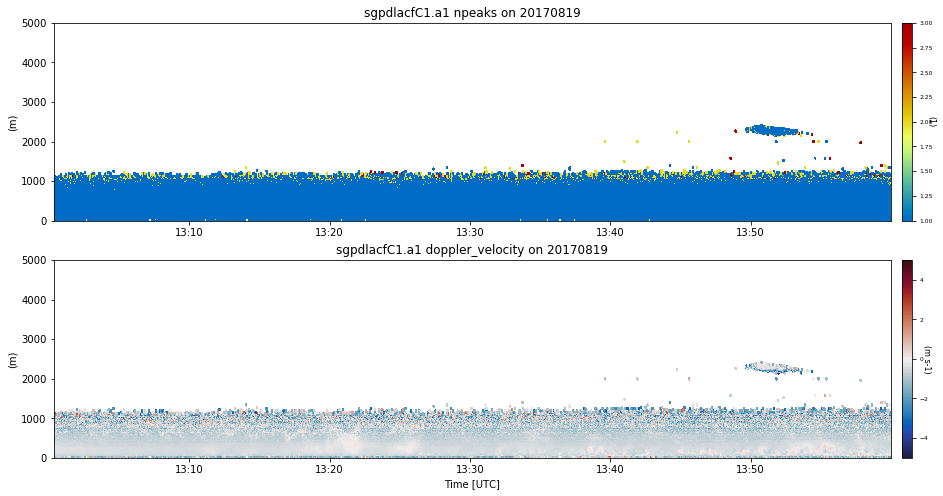